# "TCGA samples comparison on PCA plots"

>"Download GDC TCGA Bile Duct Cancer then run and plot PCA with draw_pca()"

- toc: false
- branch: master
- badges: true
- comments: false
- categories: [R, jupyter, PCA, ggplot, TCGA]
- image: images/two_PCA.png
- hide: false

Inspired by one of the plots in this publication about urban/rural clovers, I was thinking if we can apply similar method to show some TCGA data, here is what I've tried:

First, download count and metadata from [UCSC Xena](https://xenabrowser.net/datapages/?cohort=GDC%20TCGA%20Bile%20Duct%20Cancer%20(CHOL)&removeHub=https%3A%2F%2Fxena.treehouse.gi.ucsc.edu%3A443):

In [4]:
proj <- "TCGA-CHOL"
header <- "https://gdc.xenahubs.net/download/"

In [ ]:
download.file(url = paste0(hearder ,proj, ".htseq_counts.tsv.gz"),destfile = paste0(proj,".htseq_counts.tsv.gz"))
download.file(url = paste0(hearder ,proj, ".GDC_phenotype.tsv.gz"),destfile = paste0(proj,".GDC_phenotype.tsv.gz"))
#download.file(url = paste0(hearder ,proj, ".survival.tsv"),destfile = paste0(proj,".survival.tsv"))

In [5]:
phenotype <- read.delim(paste0(proj,".GDC_phenotype.tsv.gz"),fill = T,header = T,sep = "\t")

Take a look at phenotype data:

In [6]:
phenotype[1:3,]

,submitter_id.samples,age_at_initial_pathologic_diagnosis,albumin_result_lower_limit,albumin_result_specified_value,albumin_result_upper_limit,batch_number,bcr,bcr_followup_barcode,bcr_followup_uuid,submitter_id,⋯,days_to_collection.samples,days_to_sample_procurement.samples,initial_weight.samples,is_ffpe.samples,oct_embedded.samples,preservation_method.samples,sample_type.samples,sample_type_id.samples,state.samples,tissue_type.samples
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<lgl>,<dbl>,<chr>,<chr>,<lgl>,<chr>,<int>,<chr>,<chr>
1,TCGA-ZH-A8Y2-01A,59,NA,NA,NA,428.25.0,Nationwide Children's Hospital,,,TCGA-ZH-A8Y2,⋯,897,NA,400,False,false,NA,Primary Tumor,1,released,Not Reported
2,TCGA-ZH-A8Y7-01A,59,3.5,2.4,5,448.13.0,Nationwide Children's Hospital,,,TCGA-ZH-A8Y7,⋯,77,NA,1100,False,false,NA,Primary Tumor,1,released,Not Reported
3,TCGA-W7-A93O-01A,NA,NA,NA,NA,448.13.0,Nationwide Children's Hospital,,,TCGA-W7-A93O,⋯,465,NA,180,False,true,NA,Primary Tumor,1,released,Not Reported


Load count matrix and convert it back from log

In [14]:
data <- read.table(paste0(proj,".htseq_counts.tsv.gz"),check.names = F,row.names = 1,header = T)
data <- as.data.frame(2^dat - 1)
count <- apply(dat, 2, as.integer)
rownames(count) <- rownames(data)


In [15]:
count[1:4,1:4]

,TCGA-ZD-A8I3-01A,TCGA-W5-AA2U-11A,TCGA-W5-AA30-01A,TCGA-W5-AA38-01A
ENSG00000000003.13,5254,2476,5132,8249
ENSG00000000005.5,1,1,0,1
ENSG00000000419.11,1211,655,1643,1695
ENSG00000000457.12,752,345,2652,519


Then Filter out genes of which less than half samples have expression:

In [17]:
n_sample <- ncol(count)
n_sample
count = count[apply(count, 1, function(x) sum(x > 0) > 0.5*n_sample), ]

[1] 45

In sample Id we can extract its group info by checking the last 3 chars, like in TCGA-ZH-A8Y2-01A, 01A is tumor:

In [19]:
library(stringr)

In [20]:
Group = ifelse(as.numeric(str_sub(colnames(count),14,15)) < 10,'tumor','normal')
Group = factor(Group,levels = c("normal","tumor"))
table(Group)


Group
normal  tumor 
     9     36 

Normally we can use DESeq2, edgeR, or limma to move on to differential expression analysis, here we would jump over it for now and do PCA first.

In [ ]:
library(ggplot2)
library(tinyarray)

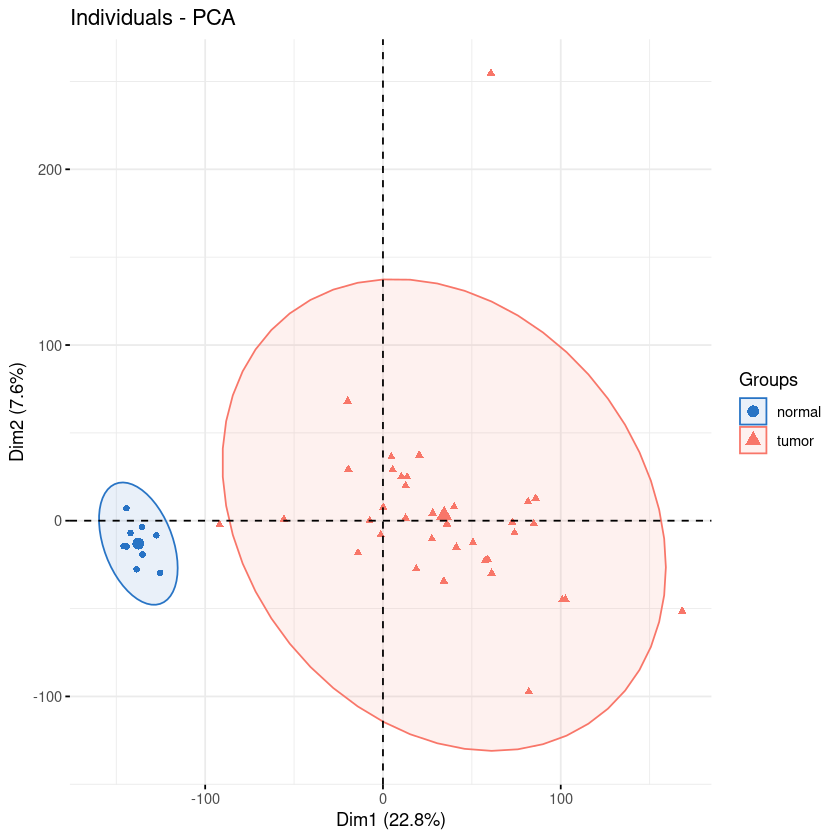

In [22]:
#data = log2(cpm(exp)+1)
pca.plot = draw_pca(count,Group);pca.plot

Here it's clear that tumor and normal samples group in their own clusters, and we have CI as ovals surround each of them. Tumor cluster is larger and one of the cause could be heterogenesis; but before that we would noticed that tumor group has more samples than normal group. Next I'm going to look at those samples that can be paired.